In [17]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Input , Dense,Dropout,GlobalMaxPool2D , Conv2D, Flatten

In [18]:
import tensorflow as tf
cifar_data = tf.keras.datasets.cifar10

In [19]:
(X_train,y_train) , (X_test,y_test) = cifar_data.load_data()

In [20]:
X_train.shape

(50000, 32, 32, 3)

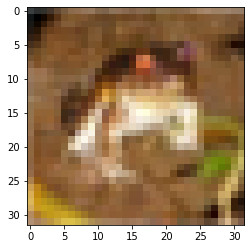

In [21]:
plt.imshow(X_train[0])

In [22]:
y_train.shape

(50000, 1)

In [23]:
y_train[0]

array([6], dtype=uint8)

In [24]:
X_train[0].shape

(32, 32, 3)

In [25]:
X_train = X_train/255.0
X_test = X_test/255.0

In [26]:
k = len(set(list(y_train.reshape(y_train.shape[0]))))

In [27]:
i = Input(shape=(X_train[0].shape))
x = Conv2D(32,(3,3),strides=2,activation='relu')(i)
x = Conv2D(64,(3,3),strides=2,activation='relu')(x)
x = Conv2D(128,(3,3),strides=2,activation='relu')(x)
x = Conv2D(256,(3,3),strides=2,activation='relu')(x)

x = GlobalMaxPool2D()(x)
x = Dropout(0.2)(x)
x = Dense(1024,activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(k, activation='softmax')(x)

In [28]:
model = Model(i,x)

In [29]:
model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

In [35]:
acc_thresh = 0.96
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get('accuracy') > acc_thresh):
            print("Stopping training as desired accuracy reached....")
            self.model.stop_training
            
        

In [36]:
callbacks = myCallback()

In [37]:
r = model.fit(X_train,y_train , epochs =10 , validation_data=(X_test,y_test) , callbacks=[callbacks])

Epoch 1/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.4368 - accuracy: 0.8441 - val_loss: 1.1016 - val_accuracy: 0.6721
Epoch 2/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.3985 - accuracy: 0.8577 - val_loss: 1.1973 - val_accuracy: 0.6644
Epoch 3/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.3828 - accuracy: 0.8639 - val_loss: 1.2417 - val_accuracy: 0.6682
Epoch 4/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.3583 - accuracy: 0.8720 - val_loss: 1.2601 - val_accuracy: 0.6738
Epoch 5/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.3421 - accuracy: 0.8794 - val_loss: 1.2669 - val_accuracy: 0.6663
Epoch 6/10
1563/1563 [==============================] - 23s 14ms/step - loss: 0.3189 - accuracy: 0.8884 - val_loss: 1.3130 - val_accuracy: 0.6675
Epoch 7/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.3102 - accuracy: 0.8910 - val_loss: 1.3994 -

In [42]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 15, 15, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 1, 256)         295168    
_________________________________________________________________
global_max_pooling2d (Global (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0     

In [46]:
model.layers[1].get_weights()

[array([[[[-4.68172804e-02, -1.31001115e-01,  1.34572029e-01,
            1.43149257e-01,  2.30107933e-01, -2.74789780e-01,
           -1.02655649e-01, -2.08083674e-01,  1.33426249e-01,
           -1.89854324e-01,  4.71040495e-02, -2.57009417e-01,
           -1.93473667e-01, -1.13071762e-01, -2.45083421e-01,
            1.08689100e-01, -2.24207968e-01,  3.20641138e-02,
           -2.47576922e-01, -7.39834011e-02,  2.90583428e-02,
           -1.17114680e-02,  2.78848469e-01, -9.16115288e-03,
            1.27170682e-01, -1.72494754e-01,  1.39009193e-01,
            5.54054864e-02, -1.65055081e-01, -1.47544026e-01,
           -5.33591136e-02, -2.40255576e-02],
          [-5.76829910e-02, -7.33849704e-02,  1.60439149e-01,
           -1.59724080e-03,  1.07555546e-01, -4.80823740e-02,
            2.67113969e-02,  2.50074174e-02, -8.70639011e-02,
            1.37481140e-02,  1.79870665e-01, -3.63153189e-01,
           -1.21897377e-01, -1.14224389e-01,  1.07213274e-01,
            3.46163847e-

## Improvement using Data Augmentation

In [47]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [52]:
data_gen = ImageDataGenerator(width_shift_range=0.1 , height_shift_range=0.2 , horizontal_flip= True)

In [53]:
help(ImageDataGenerator)

Help on class ImageDataGenerator in module tensorflow.python.keras.preprocessing.image:

class ImageDataGenerator(keras_preprocessing.image.image_data_generator.ImageDataGenerator)
 |  Generate batches of tensor image data with real-time data augmentation.
 |  
 |   The data will be looped over (in batches).
 |  
 |  Arguments:
 |      featurewise_center: Boolean.
 |          Set input mean to 0 over the dataset, feature-wise.
 |      samplewise_center: Boolean. Set each sample mean to 0.
 |      featurewise_std_normalization: Boolean.
 |          Divide inputs by std of the dataset, feature-wise.
 |      samplewise_std_normalization: Boolean. Divide each input by its std.
 |      zca_epsilon: epsilon for ZCA whitening. Default is 1e-6.
 |      zca_whitening: Boolean. Apply ZCA whitening.
 |      rotation_range: Int. Degree range for random rotations.
 |      width_shift_range: Float, 1-D array-like or int
 |          - float: fraction of total width, if < 1, or pixels if >= 1.
 |     

In [54]:
help(data_gen.flow)

Help on method flow in module keras_preprocessing.image.image_data_generator:

flow(x, y=None, batch_size=32, shuffle=True, sample_weight=None, seed=None, save_to_dir=None, save_prefix='', save_format='png', subset=None) method of tensorflow.python.keras.preprocessing.image.ImageDataGenerator instance
    Takes data & label arrays, generates batches of augmented data.
    
    # Arguments
        x: Input data. Numpy array of rank 4 or a tuple.
            If tuple, the first element
            should contain the images and the second element
            another numpy array or a list of numpy arrays
            that gets passed to the output
            without any modifications.
            Can be used to feed the model miscellaneous data
            along with the images.
            In case of grayscale data, the channels axis of the image array
            should have value 1, in case
            of RGB data, it should have value 3, and in case
            of RGBA data, it should 

In [55]:
train_gen = data_gen.flow(X_train,y_train,batch_size=32)

In [56]:
steps_per_epoch = X_train.shape[0]//32

In [57]:
r = model.fit_generator(train_gen , steps_per_epoch = steps_per_epoch ,epochs = 20 , callbacks=[callbacks])  # can now use model.fit

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
1562/1562 [==============================] - 34s 22ms/step - loss: 1.2524 - accuracy: 0.5701
Epoch 2/20
1562/1562 [==============================] - 34s 22ms/step - loss: 1.1415 - accuracy: 0.6014
Epoch 3/20
1562/1562 [==============================] - 34s 22ms/step - loss: 1.0976 - accuracy: 0.6160
Epoch 4/20
1562/1562 [==============================] - 35s 23ms/step - loss: 1.0613 - accuracy: 0.6290
Epoch 5/20
1562/1562 [==============================] - 36s 23ms/step - loss: 1.0355 - accuracy: 0.6379
Epoch 6/20
1562/1562 [==============================] - 33s 21ms/step - loss: 1.0075 - accuracy: 0.6481
Epoch 7/20
1562/1562 [==============================] - 33s 21ms/step - loss: 0.9987 - accuracy: 0.6514
Epoch 8/20
1562/1562 [==============================] - 33s 21ms/step - loss: 0.9809 - accuracy: 0.6589
Epoch 9/20
1562/1562 [==============================] - 34s 22ms/step - loss: 0.9649 - accur